# Project
Finding the best two markets to advertise product in.

In [20]:
import pandas as pd
data = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning:

Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.



In [21]:
print(data.shape)

(18175, 136)


In [22]:
print(data.head())

    Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo BootcampName  \
0  27.0               0.0             NaN                NaN          NaN   
1  34.0               0.0             NaN                NaN          NaN   
2  21.0               0.0             NaN                NaN          NaN   
3  26.0               0.0             NaN                NaN          NaN   
4  20.0               0.0             NaN                NaN          NaN   

   BootcampRecommend  ChildrenNumber                 CityPopulation  \
0                NaN             NaN            more than 1 million   
1                NaN             NaN              less than 100,000   
2                NaN             NaN            more than 1 million   
3                NaN             NaN  between 100,000 and 1 million   
4                NaN             NaN  between 100,000 and 1 million   

   CodeEventConferences  CodeEventDjangoGirls         ...           \
0                   NaN                 

Using free data (cheaper!) available from https://github.com/freeCodeCamp/2017-new-coder-survey

In [23]:
data['JobRoleInterest'].value_counts(normalize=True)*100

Full-Stack Web Developer                                                                                                                                                                                                                                                    11.770595
  Front-End Web Developer                                                                                                                                                                                                                                                    6.435927
  Data Scientist                                                                                                                                                                                                                                                             2.173913
Back-End Web Developer                                                                                                                                                

Is this population relevant? Yes, since we focus mostly on web development, which many people are interested in.

## Analysis
Now that we know the data is useful, let's look at best markets, using the location of each survey participant indicated in the CountryLive column.

In [24]:
data = data[data['JobRoleInterest'].notnull()]
data['CountryLive'].value_counts()

United States of America         3125
India                             528
United Kingdom                    315
Canada                            260
Poland                            131
Brazil                            129
Germany                           125
Australia                         112
Russia                            102
Ukraine                            89
Nigeria                            84
Spain                              77
France                             75
Romania                            71
Netherlands (Holland, Europe)      65
Italy                              62
Serbia                             52
Philippines                        52
Greece                             46
Ireland                            43
South Africa                       39
Mexico                             37
Turkey                             36
Hungary                            34
Singapore                          34
New Zealand                        33
Croatia     

In [25]:
data['CountryLive'].value_counts(normalize = True)*100

United States of America         45.700497
India                             7.721556
United Kingdom                    4.606610
Canada                            3.802281
Poland                            1.915765
Brazil                            1.886517
Germany                           1.828020
Australia                         1.637906
Russia                            1.491664
Ukraine                           1.301550
Nigeria                           1.228429
Spain                             1.126060
France                            1.096812
Romania                           1.038315
Netherlands (Holland, Europe)     0.950570
Italy                             0.906698
Serbia                            0.760456
Philippines                       0.760456
Greece                            0.672711
Ireland                           0.628839
South Africa                      0.570342
Mexico                            0.541094
Turkey                            0.526470
Hungary    

Clearly, the USA are a must-use market. India is in second place, but it may be wise to conduct further analysis to determine the potential there in terms of purchase power.
## Analysis of money spent
Let's calculate how much money they spend per month, and remove rows for freeloaders.

In [26]:
data['MonthsProgramming'].isnull().sum()

359

In [31]:
data[data['MonthsProgramming'] ==0] = 1
data['MonthsProgramming'].isnull().sum()

0

In [ ]:
data['money_per_month'] = data['MoneyForLearning'] / data['MonthsProgramming']

In [28]:
data['money_per_month'].isnull().sum()

669

In [29]:
data = data[data['money_per_month'].notnull()]
data['money_per_month'].isnull().sum()

0

In [30]:
data = data[data['CountryLive'].notnull()]
data.groupby('CountryLive').mean()['money_per_month'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

CountryLive
United States of America    232.771574
India                       136.347477
United Kingdom               46.904110
Canada                      107.415450
Name: money_per_month, dtype: float64

Counter intuitively, Indian is more willing to spend money than the UK.
## Looking for outliers

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



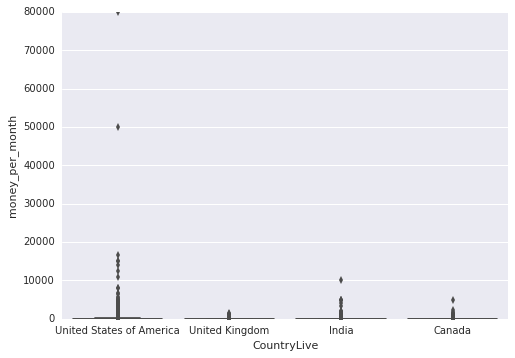

In [45]:
list_of_countries = ['United States of America',
                            'India', 'United Kingdom',
                            'Canada']
data_4_countries = data[data['CountryLive'].isin(list_of_countries)]
import seaborn as sns
sns.boxplot(y = 'money_per_month', x = 'CountryLive',
            data = data_4_countries)


Clearly the USa has some extreme outliers. Let's remove them

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



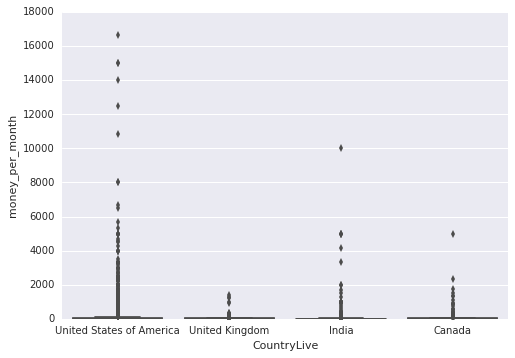

In [47]:
data_4_countries = data_4_countries[data_4_countries['money_per_month'] <40000]
sns.boxplot(y = 'money_per_month', x = 'CountryLive',
            data = data_4_countries)

In [48]:
data_4_countries.groupby('CountryLive').mean()['money_per_month']

CountryLive
Canada                      107.415450
India                       136.347477
United Kingdom               46.904110
United States of America    186.641069
Name: money_per_month, dtype: float64